### Packages for Graphics

In [1]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preprocessing

### Packages for Data Preprocessing

In [59]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### Load the dataset

In [12]:
datasets_dir = '../Datasets/'
csv_path = os.path.join(datasets_dir, 'cheating_dataset.csv')
csv_path
raw_df = pd.read_csv(csv_path)

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 93 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   participant_id                 3886 non-null   object 
 1   age                            3857 non-null   float64
 2   sex                            3851 non-null   float64
 3   society_type                   3886 non-null   int64  
 4   university_degree              3886 non-null   int64  
 5   education_subject              3802 non-null   object 
 6   appear_online_test_2_years     3142 non-null   object 
 7   condition                      3886 non-null   object 
 8   time_question                  3886 non-null   int64  
 9   device_changed_question        3886 non-null   int64  
 10  browser_changed_question       3886 non-null   int64  
 11  question_number                3886 non-null   int64  
 12  answer_correct                 3886 non-null   i

In [14]:
raw_df.participant_id.nunique()

997

In [20]:
# setup for matplotlib and sns
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [29]:
fig = px.histogram(raw_df, 
                   x='age', 
                   marginal='box', 
                   color='device_changed_question',
                   nbins=47, 
                   title='Time taken and cheating')
fig.update_layout(bargap=0.1)
fig.show()

In [57]:
#px.histogram(raw_df, x='time_question', title='Cheating vs time taken', color='cheated_question')
fig = px.scatter(raw_df,
# fig = px.scatter(medical_df[medical_df.smoker=='no'], 
                 x='negative_emotion', 
                 y='time_question', 
                 color='cheated_question', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Time Taken vs Cheating')
fig.update_traces(marker_size=5)
fig.show()

In [43]:
fig = px.violin(raw_df, x='question_number', y='cheated_question')
fig.show()

### Inputs and targets for Training, Validation and Testing datasets

In [61]:

# Create training, validation and test sets
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

# Create inputs and targets
# input_cols = list(train_df.columns)[1:-1]
target_col = 'cheated_question'
input_cols = [col for col in raw_df.columns if col != target_col]

def create_inputs_and_targets(df):
    return df[input_cols].copy(), df[target_col].copy()

train_inputs, train_targets = create_inputs_and_targets(train_df)
val_inputs, val_targets = create_inputs_and_targets(val_df)
test_inputs, test_targets = create_inputs_and_targets(test_df)


### Imputing, encoding, Scaling and Encoding

In [75]:
# Identify numeric and categorical columns
numeric_cols = [col for col in train_inputs.select_dtypes(include=np.number).columns if col != 'cheated_overall']
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()[1:]


# Function for transforming inputs (Impute, Scale, One-hot encode)
def preprocess_data(inputs, imputer, scaler, encoder):
    inputs[numeric_cols] = imputer.transform(inputs[numeric_cols])
    inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
    inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
    return inputs[numeric_cols + encoded_cols]


# Impute missing values and scale numeric columns
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])
scaler = MinMaxScaler().fit(raw_df[numeric_cols])


# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))


# Transform all inputs
train_inputs = preprocess_data(train_inputs, imputer, scaler, encoder)
val_inputs = preprocess_data(val_inputs, imputer, scaler, encoder)
test_inputs = preprocess_data(test_inputs, imputer, scaler, encoder)

/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_10286/718332592.py:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_10286/718332592.py:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_10286/718332592.py:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

In [81]:
train_inputs.describe()

,age,sex,society_type,university_degree,time_question,device_changed_question,browser_changed_question,question_number,answer_correct,device_changed_overall,...,appear_online_test_2_years_1-5,appear_online_test_2_years_11-20,appear_online_test_2_years_21-30,appear_online_test_2_years_31 or above,appear_online_test_2_years_6-10,appear_online_test_2_years_nan,condition_Control,condition_Honor code reminder,condition_Monitoring,condition_Warning
count,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,...,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,0.387761,0.503009,0.084084,0.566710,0.174099,0.010296,0.026169,0.499070,0.026598,0.026598,...,0.406692,0.078936,0.042900,0.150150,0.132132,0.189189,0.255684,0.245388,0.247104,0.251823
std,0.244884,0.497840,0.277573,0.495636,0.100358,0.100967,0.159672,0.373970,0.160940,0.160940,...,0.491322,0.269697,0.202675,0.357295,0.338707,0.391743,0.436339,0.430409,0.431420,0.434153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188679,0.000000,0.000000,0.000000,0.099391,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.358491,0.500649,0.000000,1.000000,0.162272,0.000000,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.584906,1.000000,0.000000,1.000000,0.235294,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.724138,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Save the processed datasets

In [76]:
# Define the directory for processed data
processed_data_dir = './processed_data'
# Ensure the 'processed_data' directory exists
os.makedirs(processed_data_dir, exist_ok=True)

# Save processed data inside 'processed_data' folder
for name, df in zip(['train', 'val', 'test'], [train_inputs, val_inputs, test_inputs]):
    # Save the inputs
    input_path = os.path.join(processed_data_dir, f'{name}_inputs.parquet')
    df.to_parquet(input_path)
    
    # Save the targets
    target_path = os.path.join(processed_data_dir, f'{name}_targets.parquet')
    pd.DataFrame(eval(f'{name}_targets')).to_parquet(target_path)

## Model Training and Evaluation

### Packages for Training and Evaluation Metrics

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

### Training and Saving the Model

In [78]:
# Select the columns to be used for training/prediction (discarding categorical columns)
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)


# Define the directory for saving the model
saved_model_dir = './model'
# Ensure the 'model' directory exists
os.makedirs(saved_model_dir, exist_ok=True)
# Define the full path to save the model file inside the 'model' folder
model_path = os.path.join(saved_model_dir, 'cheating_prediction.joblib')

# Save the trained model
joblib.dump({'model': model, 'imputer': imputer, 'scaler': scaler, 'encoder': encoder,
             'input_cols': input_cols, 'numeric_cols': numeric_cols, 'encoded_cols': encoded_cols}, model_path)



['./model/cheating_prediction.joblib']

### Prediction and Evaluation of the Model

#### Feature importance

/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_10286/3279535362.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='weight', ylabel='feature'>

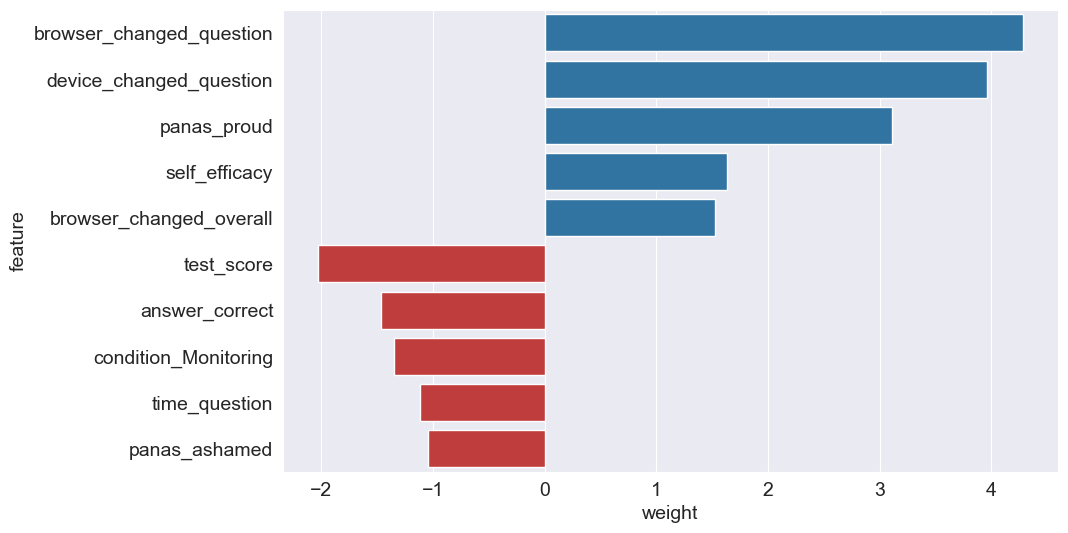

In [79]:
weights_df = pd.DataFrame({
    'feature': numeric_cols + encoded_cols,
    'weight': model.coef_.tolist()[0]
})
weights_df.sort_values('weight', ascending=False)


positive_weights = weights_df[weights_df['weight'] > 0].sort_values('weight', ascending=False).head(5)
negative_weights = weights_df[weights_df['weight'] <= 0].sort_values('weight', ascending=True).head(5)

top_bottom_weights = pd.concat([positive_weights, negative_weights])

# Create a barplot for both positive and negative weights
sns.barplot(data=top_bottom_weights, x='weight', y='feature', 
            palette=['#1f77b4' if x > 0 else '#d62728' for x in top_bottom_weights['weight']])

Training Accuracy: 94.04%


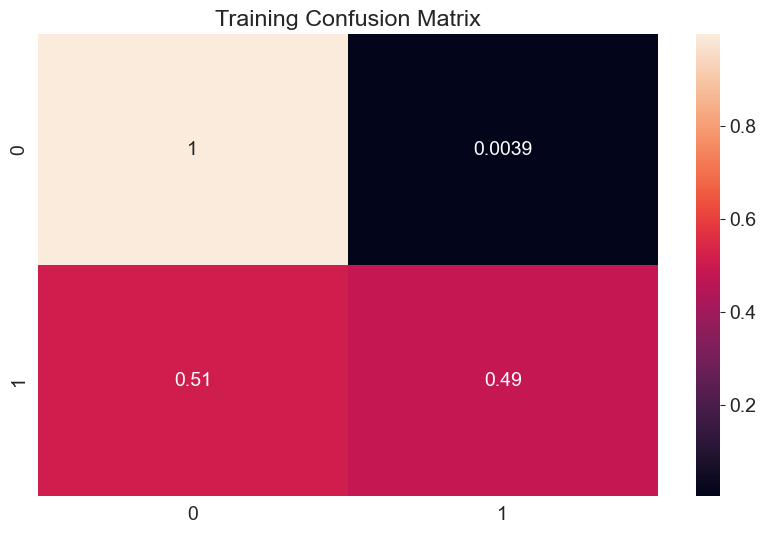

Validation Accuracy: 93.82%


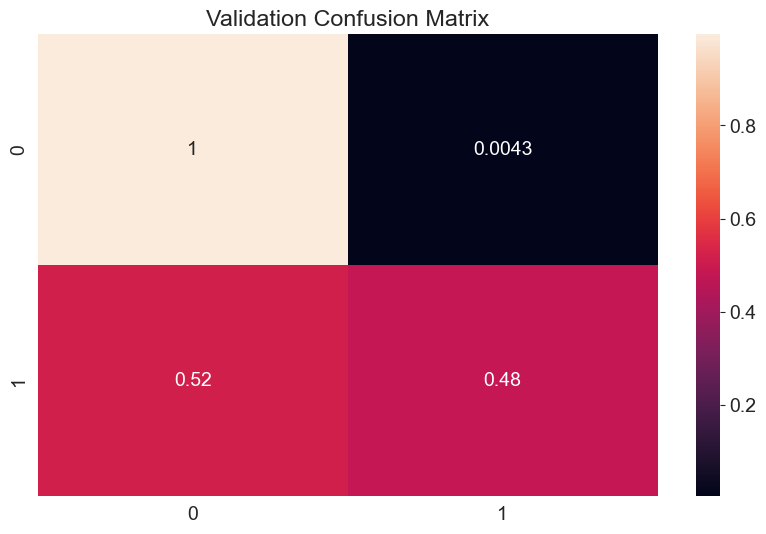

Test Accuracy: 93.57%


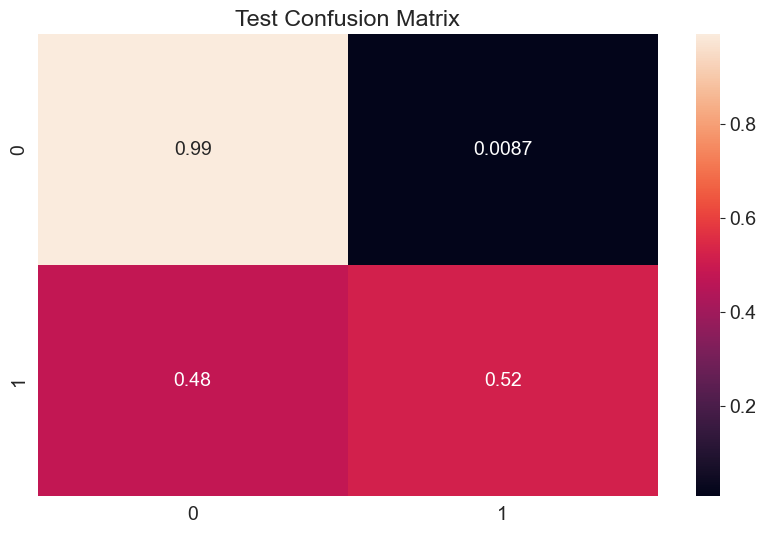

In [82]:
# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

# Helper function to predict and plot
def predict_and_plot(inputs, targets, name):
    preds = model.predict(inputs)
    # print(f"{name} Prob. Distribution: {model.predict_proba(inputs)}")
    accuracy = accuracy_score(targets, preds)
    print(f"{name} Accuracy: {accuracy:.2%}")
    
    cf = confusion_matrix(targets, preds, normalize='true')
    sns.heatmap(cf, annot=True)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Evaluate on validation and test set
train_preds = predict_and_plot(X_train, train_targets, 'Training')
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

# model = joblib.load('aussie_rain.joblib')

## Prediction on Single Inputs 

In [13]:
# Function to predict with new input
def predict_input(new_input):
    input_df = pd.DataFrame([new_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

predict_input(new_input)

/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_96516/284936462.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_96516/284936462.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_96516/284936462.py:6: PerformanceWarning: DataFrame is highly fragmented.  This

('Yes', np.float64(0.6316466668984417))